<a href="https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch7_3_sentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
title: "Tensorflow 2.0 Tutorial ch7.3 - 긍정, 부정 감성 분석"
date: 2020-04-25T11:08:30+09:00
tags:
  - "Deep Learning"
  - "Python"
  - "Google Colab"
  - "Tensorflow 2.0"
  - "Binary Classification"
  - "Classification"
  - "Sentiment Analysis"
  - "긍정, 부정 감성분석"
  - "텐서플로 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
categories:
  - "Deep Learning"
  - "딥러닝"
  - "텐서플로 2.0"
  - "Python"
  - "Tensorflow 2.0"
  - "텐서플로 2.0 튜토리얼"
  - "Tensorflow 2.0 Tutorial"
menu: 
  python:
    name: Tensorflow 2.0 Tutorial ch7.3 - 긍정, 부정 감성 분석
---

## 공지

- 본 Tutorial은 교재 `시작하세요 텐서플로 2.0 프로그래밍`의 강사에게 국비교육 강의를 듣는 사람들에게 자료 제공을 목적으로 제작하였습니다. 

- 강사의 주관적인 판단으로 압축해서 자료를 정리하였기 때문에, 자세하게 공부를 하고 싶으신 분은 반드시 교재를 구매하실 것을 권해드립니다. 

![](/img/tensorflow2.0/book.jpg)<!-- -->


- 본 교재 외에 강사가 추가한 내용에 대한 Reference를 확인하셔서, 추가적으로 학습하시는 것을 권유드립니다. 


## Tutorial

이전 강의가 궁금하신 분들은 아래에서 선택하여 추가 학습 하시기를 바랍니다. 

- [Google Colab Tensorflow 2.0 Installation](https://chloevan.github.io/python/tensorflow2.0/googlecolab/)
- [Tensorflow 2.0 Tutorial ch3.3.1 - 난수 생성 및 시그모이드 함수](https://chloevan.github.io/python/tensorflow2.0/ch3_3_1_random_signoid/)
- [Tensorflow 2.0 Tutorial ch3.3.2 - 난수 생성 및 시그모이드 함수 편향성](https://chloevan.github.io/python/tensorflow2.0/ch3_3_2_random_signoid_bias/)
- [Tensorflow 2.0 Tutorial ch3.3.3 - 첫번째 신경망 네트워크 - AND](https://chloevan.github.io/python/tensorflow2.0/ch3_3_3_network_and/)
- [Tensorflow 2.0 Tutorial ch3.3.4 - 두번째 신경망 네트워크 - OR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_4_network_or/)
- [Tensorflow 2.0 Tutorial ch3.3.5 - 세번째 신경망 네트워크 - XOR](https://chloevan.github.io/python/tensorflow2.0/ch3_3_5_network_xor/)
- [Tensorflow 2.0 Tutorial ch4.1 - 선형회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_1_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.2 - 다항회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_2_multiple_linear_regression/)
- [Tensorflow 2.0 Tutorial ch4.3 - 딥러닝 네트워크를 이용한 회귀](https://chloevan.github.io/python/tensorflow2.0/ch4_3_regression_with_deeplearning/)
- [Tensorflow 2.0 Tutorial ch4.4 - 보스턴 주택 가격 데이터세트](https://chloevan.github.io/python/tensorflow2.0/ch4_4_boston_housing_deeplearning/)
- [Tensorflow 2.0 Tutorial ch5.1 - 분류](https://chloevan.github.io/python/tensorflow2.0/ch5_1_binary_classification/)
- [Tensorflow 2.0 Tutorial ch5.2 - 다항분류](https://chloevan.github.io/python/tensorflow2.0/ch5_2_multi_classification/)
- [Tensorflow 2.0 Tutorial ch5.3 - Fashion MNIST](https://chloevan.github.io/python/tensorflow2.0/ch5_3_fashion_mnist/)
- [Tensorflow 2.0 Tutorial ch6.1-2 - CNN 이론](https://chloevan.github.io/python/tensorflow2.0/ch6_1_2_cnn_theory/)
- [Tensorflow 2.0 Tutorial ch6.3 - Fashion MNIST with CNN 실습](https://chloevan.github.io/python/tensorflow2.0/ch6_3_fashion_mnist_with_cnn/)
- [Tensorflow 2.0 Tutorial ch6.4 - 모형의 성능 높이기](https://chloevan.github.io/python/tensorflow2.0/ch6_4_improve_performance/)
- [Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (1)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory1/)
- [Tensorflow 2.0 Tutorial ch7.1 - RNN 이론 (2)](https://chloevan.github.io/python/tensorflow2.0/ch7_1_2_rnn_theory2/)


## I. 개요

감성 분석은 입력된 자연어 안의 주관적 의견, 감정 등을 찾아내는 문제입니다. 문장의 긍정/부정이나 긍정/중립/부정을 분류합니다. 

영화 리뷰나 음식점 리뷰는 데이터의 양이 많고 별점을 함께 달기 때문에 긍정/중립/부정 라벨링이 쉬워서 극성 감성 분석에 쉽게 적용이 가능합니다. 

## II. 감정분석 소스 작성 및 설명
네이버의 박은정 박사가 2015년에 발표한 "Naver Sentiment Movie Corpus v1.0"을 이용해 긍정/부정 감성 분석을 해봅니다. 

여기에는 훈련 데이터로 15만개, 테스트 데이터로 5만개로 총 20만개의 리뷰가 있습니다. 

리뷰 중 10만 개븐 별점이 1-4로 부정적인 리뷰이고, 나머지 10만개는 9-10으로 긍정적인 리뷰입니다. 별점 5-8에 해당하는 리뷰는 중립적이라고도 볼 수 있지만, 데이터 세트에서는 제외합니다. 

### (1) 데이터 로드
박은정 박사 깃허브에 올라와 있는 데이터를 가져오도록 합니다. 별도 파일을 로컬로 내려받을 필요 없이 직접 깃허브에서 가져와서 구글 코랩에 연동할 수 있도록 하는 코드입니다. 특히 딥러닝 예제는 일반적인 머신러닝과 달리 데이터의 양이 클 수 밖에 없습니다. 그러니, 꼭 참조하시기를 바랍니다. 

In [0]:
# 텐서플로 2 버전 선택
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
import numpy as np
import pandas as pd

In [0]:
path_to_train_file = tf.keras.utils.get_file('train.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt')
path_to_test_file = tf.keras.utils.get_file('test.txt', 'https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt')

4898816/4893335 [==============================] - 0s 0us/step


다운로드가 완료되면 데이터를 메모리에 불러옵니다. 이 때 데이터가 어떻게 생겼는지 간단하게 확인해 볼 수 있습니다. 

In [0]:
train_text = open(path_to_train_file, 'rb').read().decode(encoding='utf-8')
test_text = open(path_to_test_file, 'rb').read().decode(encoding='utf-8')

# 텍스트가 총 몇 자인지 확인해봅니다. 
print('Length of text: {} characters'.format(len(train_text)))
print(('Length of text: {} characters'.format(len(test_text))))

# 처음 300자를 확인해봅니다. 
print(train_text[:300])

Length of text: 6937271 characters
Length of text: 2318260 characters
id	document	label
9976970	아 더빙.. 진짜 짜증나네요 목소리	0
3819312	흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나	1
10265843	너무재밓었다그래서보는것을추천한다	0
9045019	교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정	0
6483659	사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 던스트가 너무나도 이뻐보였다	1
5403919	막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.	0
7797314	원작의


데이터의 각 행은 탭 문자(\t)로 구분되어 있습니다. 처음의 `id`는 각 데이터의 고유한 `id`이고, document는 실제 리뷰 내용입니다. `label`은 긍정/부정을 나타내는 값으로, 0은 부정, 1은 긍정입니다. 

책에는 기술되어 있지 않은 실무적인 내용을 조금 기술합니다 (물론 필자의 주관적인 견해입니다). 국내외 딥러닝의 연구 및 적용 사례는 대기업 수준에서는 활발하게 이루어지고 있지만, 실제 대다수가 사용되어야 할 일반적인 쇼핑몰 등에서는 거의 사용되지 않고 있습니다. 

감정 분석의 비즈니스 가치가 일반적인 소규모 기업에서는 매우 작을수도 있습니다. 그러나, 그럼에도 불구하고, 감정 분석은 각 제품 또는 기업의 이미지 개선에 많은 도움을 주는 것은 뻔합니다. 

그런데, 여기서 데이터상으로 말씀을 드리면, 위 데이터셋은 매우 깔끔하게 처리된 데이터셋입니다. 데이터셋 전처리의 End-Point는 위 데이터셋으로 진행하지만, 문제는 `Labeling`입니다. 

그런데, 초기 댓글에는 라벨링이 존재하지 않습니다. 즉, 이 때 초기 데이터셋을 뽑아서 라벨링을 진행해주셔야 합니다. (수동으로)

초기 수동으로 뽑은 데이터로 학습을 시킨 후, 계속 나오는 댓글을 테스트 데이터로 확인 후 재 라벨링하는 방법으로 오류를 개선하고 데이터층을 쌓는 노력을 계속해야 합니다. 

### (2) 학습을 위한 정답 데이터 (Y) 만들기
이제 학습을 위한 훈련 데이터와 테스트 데이터를 만들어 봅니다. 입력(X)에 해당하는 자연어의 처리는 복잡한 과정이기 때문에 조금 뒤에서 다루도록 하고 일단 0, 1만 존재하는 출력(Y)부터 처리해 봅니다. 

In [0]:
# 7.21 학습을 위한 정답 데이터(Y) 만들기
train_Y = np.array([[int(row.split('\t')[2])] for row in train_text.split('\n')[1:] if row.count('\t') > 0])
test_Y = np.array([[int(row.split('\t')[2])] for row in test_text.split('\n')[1:] if row.count('\t') > 0])

print(train_Y.shape, test_Y.shape)
print(train_Y[:5])

(150000, 1) (50000, 1)
[[0]
 [1]
 [0]
 [0]
 [1]]


train_Y, test_Y를 구하는 방법은, 
- 먼저 각 텍스트를 개행 문자(`\n`)로 분리한 다음 헤더에 해당하는 부분(id document label)을 제외한 나머지([1:])에 대해 각 행을 처리합니다. 
- 각 행은 탭 문자(`\t`)로 나눠진 후에 2번째 원소(파이썬은 0부터 숫자를 셉니다. 실제로는 3번째 원소입니다)를 정수(integer)로 변환해서 저장합니다. 
- 마지막에는 `np.array`로 결과 리스트를 감싸서 네트워크에 입력하기 쉽게 만듭니다. 

훈련 데이터의 `Y`의 첫 원소 다섯 개를 출력해보면 정답 라벨이 잘 들어있음을 확인할 수 있습니다. 

### (3) 훈련 데이터의 정제
입력으로 쓸 자연어를 토큰화(Tokenization)하고 정제(Cleansing)를 해야 합니다. 토큰화는 자연어를 처리 가능한 작은 단위로 나누는 것이고, 여기서는 단어를 사용하는 것이기 때문에 띄어쓰기 단위로 나누면 됩니다. 

정제란 원하지 않는 입력이나 불필요한 기호 등을 제거하는 것입니다. 정제를 위한 함수로는 김윤 박사의 `CNN_sentence` 깃허브 저장소[^1]의 코드를 사용합니다. 
- 원 소스코드는 `process_data.py`에 있습니다. 

````markdown
import re

def clean_str(string, TREC=False):
    """
    Tokenization/string cleaning for all datasets except for SST.
    Every dataset is lower cased except for TREC
    """
    string = re.sub(r"[^A-Za-z0-9(),!?\'\`]", " ", string)     
    string = re.sub(r"\'s", " \'s", string) 
    string = re.sub(r"\'ve", " \'ve", string) 
    string = re.sub(r"n\'t", " n\'t", string) 
    string = re.sub(r"\'re", " \'re", string) 
    string = re.sub(r"\'d", " \'d", string) 
    string = re.sub(r"\'ll", " \'ll", string) 
    string = re.sub(r",", " , ", string) 
    string = re.sub(r"!", " ! ", string) 
    string = re.sub(r"\(", " \( ", string) 
    string = re.sub(r"\)", " \) ", string) 
    string = re.sub(r"\?", " \? ", string) 
    string = re.sub(r"\s{2,}", " ", string)    

    return string.strip() if TREC else string.strip().lower()
````

우선 위 코드를 기반으로 코드를 작성합니다. 

[^1]: 출처: https://github.com/yoonkim/cnn_sentence

In [0]:
# 7.22 train 데이터의 입력(X)에 대한 정제(Cleaning)
import re
# From https://github.com/yoonkim/CNN_sentence/blob/master/process_data.py

def clean_str(string):    
    string = re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
    string = re.sub(r"\'s", " \'s", string)
    string = re.sub(r"\'ve", " \'ve", string)
    string = re.sub(r"n\'t", " n\'t", string)
    string = re.sub(r"\'re", " \'re", string)
    string = re.sub(r"\'d", " \'d", string)
    string = re.sub(r"\'ll", " \'ll", string)
    string = re.sub(r",", " , ", string)
    string = re.sub(r"!", " ! ", string)
    string = re.sub(r"\(", " \( ", string)
    string = re.sub(r"\)", " \) ", string)
    string = re.sub(r"\?", " \? ", string)
    string = re.sub(r"\s{2,}", " ", string)
    string = re.sub(r"\'{2,}", "\'", string)
    string = re.sub(r"\'", "", string)

    return string.lower()

train_text_X = [row.split('\t')[1] for row in train_text.split('\n')[1:] if row.count('\t') > 0]
train_text_X = [clean_str(sentence) for sentence in train_text_X]
# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in train_text_X]
for i in range(5):
    print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조차', '가볍지', '않구나']
['너무재밓었다그래서보는것을추천한다']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그의', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨에서', '늙어보이기만', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


`clean_str(string)` 함수는 다수의 정규표현식을 사용하고 있습니다만 첫 줄을 제외하면 세 번째 인수인 `string`에서 첫 번째 인수에 해당하는 내용을 찾아서 두 번째 인수로 단순히 교체해주는 것입니다. 

```python
re.sub(r"[^가-힣A-Za-z0-9(),!?\'\`]", " ", string)
```

위 정규표현식에서 특이한 점은 대괄호([])로 묶은 부분의 처음에 `^`가 들어가 있다는 점입니다. 이 기호는 대괄호 안의 내용을 찾은 다음에, 그에 포함되지 않는 나머지 모두를 선택한다는 뜻입니다. 즉, 한글, 영문, 숫자, 괄호, 쉽표, 느낌표, 물음표, 작은따옴표('), 역따옴표(`)를 제외한 나머지는 모두 찾아서 공백(" ")으로 바꾸겠다는 뜻입니다.[^2]

훈련 데이터의 처음 다섯 개를 출력해보면 구두점(.) 기호가 삭제된 것을 확인할 수 있습니다. 그런데, 아시다시피, 네트워크에 입력하려면 데이터의 크기(문장의 길이)는 동일해야 하는데, 그렇지 않습니다. 긴 문장은 줄이고, 짧은 문장에는 공백을 의미하는 (`padding`)을 채워 넣어야 합니다. 

각 문장의 길이를 그래프로 그려봅니다. 

[^2]: 파이썬 정규표현식 온라인 테스트: https://regex101.com/

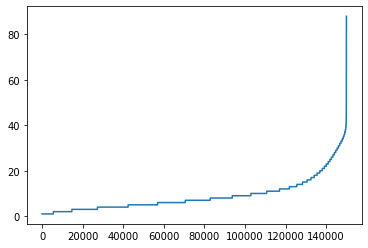

142587


In [0]:
import matplotlib.pyplot as plt
sentence_len = [len(sentence) for sentence in sentences]
sentence_len.sort()
plt.plot(sentence_len)
plt.show()

print(sum([int(l<=25) for l in sentence_len]))

### (4) 단어의 정제 및 문장 전처리

그래프의 Y축은 문장의 단어 개수입니다. 15만 개의 문장 중에서 대부분이 40단어 이하로 구성되어 있음을 확인할 수 있습니다. 특히 25단어 이하인 문장의 수는 `142,587`개로 전체의 95% 정도입니다. 따라서 기준이 되는 문장의 길이를 25단어로 잡고 이 이상은 생략, 이 이하는 패딩으로 길이를 25로 맞춰면 임베딩 레이어에 넣을 준비가 끝납니다. 

또 하나 고려해야 하는 것은 각 단어의 최대 길이를 조정하는 일입니다. 예를 들면, 훈련 데이터의 5번째 문장에서 `스파이더맨에서`라는 단어가 있는데, 이 단어는 엄밀히 말하면 조사를 제거하면 `스파이더맨`이라는 한 단어가 됩니다. 

In [0]:
sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])

sentences = sentence_new

for i in range(5):
  print(sentences[i])

['아', '더빙', '진짜', '짜증나네요', '목소리']
['흠', '포스터보고', '초딩영화줄', '오버연기조', '가볍지', '않구나']
['너무재밓었']
['교도소', '이야기구먼', '솔직히', '재미는', '없다', '평점', '조정']
['사이몬페그', '익살스런', '연기가', '돋보였던', '영화', '!', '스파이더맨', '늙어보이기', '했던', '커스틴', '던스트가', '너무나도', '이뻐보였다']


단어의 길이가 최대 다섯 글자로 줄어든 것을 확인 할 수 있습니다. 

이제 앞에서 설명한 작업 중에서 짧은 문장을 같은 길이의 문장(25단어)으로 바꾸기 위한 패딩을 넣기 위해 `tf.keras`에서 제공하는 `pad_sequences`를 사용해봅니다. 또 모든 단어를 사용하지 않고 출현 빈도가 가장 높은 일부 단어만 사용하기 위해 `Tokenizer`도 같이 병행해서 사용합니다. 

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(sentences)
train_X = tokenizer.texts_to_sequences(sentences)
train_X = pad_sequences(train_X, padding='post')

print(train_X[:5])

[[  25  884    8 1111    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 588    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [  71  346   31   35    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]
 [ 106    4    2  869  573    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0]]


- `Tokenizer`는 데이터에 출현하는 모든 단어의 개수를 세고 빈도 수로 정렬해서 `num_words`에 지정된 만큼만 숫자로 반환하고 나머지는 0으로 반환합니다. 
- `tokenizer.fit_on_texts(sentences)`는 `Tokenizer`에 데이터를 실제로 입력합니다.
- `tokenizer.texts_to_sequences(sentence)`는 문장을 입력받아 숫자를 반환합니다. 
- 마지막으로 `pad_sequences()`는 입력된 데이터에 패딩을 더합니다. 
- `pad_sequences()`의 인수에는 `pre` & `post`가 있는데, `pre`는 문장의 앞에 패딩을 넣고, `post`는 문장의 뒤에 패딩을 넣습니다. 여기에서는 `post`를 사용합니다. 

이렇게 정제된 데이터는 보시다시피 숫자로 변환이 되는 것입니다. 

In [0]:
for idx, word in enumerate(range(1,26), 1):
  print(idx, tokenizer.index_word[word])

1 
2 !
3 ,
4 영화
5 \?
6 너무
7 정말
8 진짜
9 이
10 그냥
11 왜
12 이런
13 더
14 수
15 영화를
16 다
17 잘
18 보고
19 좀
20 영화는
21 영화가
22 그
23 봤는데
24 본
25 아


각 번호마다 매칭되는 한글을 보려면 위와 같은 코드로 구현이 가능합니다. `range(1, 26)`에서 26을 바꾸면 원하는 범위까지 출력이 가능합니다. 이제 본격적으로 딥러닝 소스코드를 구현해서 모형을 만들도록 합니다. 

### (5) 딥러닝 모형 정의 및 학습 
이제 실제로 네트워크를 정의하고 학습시켜봅니다. 먼저 임베딩 레이어와 `LSTM`레이어를 연결한 뒤 마지막에 `Dense`레이어의 소프트맥스 활성화 함수를 사용해 긍정/부정을 분류하는 네트워크를 정의합니다. 

In [0]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(20000, 300, input_length=25), 
  tf.keras.layers.LSTM(units=50), 
  tf.keras.layers.Dense(2, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 300)           6000000   
_________________________________________________________________
lstm (LSTM)                  (None, 50)                70200     
_________________________________________________________________
dense (Dense)                (None, 2)                 102       
Total params: 6,070,302
Trainable params: 6,070,302
Non-trainable params: 0
_________________________________________________________________


input_length 인수가 중요합니다. 데이터 전처리를 25기준으로 정해놨기 때문에, `input_length`로 정의했습니다. 

`희소행렬(sparse_categorical_crossentropy)`에 관한 내용은 튜토리얼 5장-6장을 확인하여 주시기 바랍니다.  

In [0]:
history = model.fit(train_X, train_Y, epochs=5, batch_size=128, validation_split=0.2)

Epoch 1/5
938/938 [==============================] - 69s 73ms/step - loss: 0.4898 - accuracy: 0.7383 - val_loss: 0.4517 - val_accuracy: 0.7685
Epoch 2/5
938/938 [==============================] - 68s 72ms/step - loss: 0.4481 - accuracy: 0.7649 - val_loss: 0.4469 - val_accuracy: 0.7707
Epoch 3/5
938/938 [==============================] - 68s 73ms/step - loss: 0.4358 - accuracy: 0.7708 - val_loss: 0.4551 - val_accuracy: 0.7669
Epoch 4/5
938/938 [==============================] - 68s 73ms/step - loss: 0.4277 - accuracy: 0.7756 - val_loss: 0.4567 - val_accuracy: 0.7589
Epoch 5/5
938/938 [==============================] - 69s 73ms/step - loss: 0.4196 - accuracy: 0.7802 - val_loss: 0.4511 - val_accuracy: 0.7699


데이터가 많기 때문에 한번에 학습하는 데이터의 양인 batch_size를 128로 설정했고, 5에포크만 학습을 시킵니다. 학습 과정에서 `loss`는 꾸준히 감소하지만 `val_loss`는 점점 증가하는 것을 확인할 수 있습니다. 이는 네트워크가 과적합되고 있다는 것을 의미합니다. 

### (6) 모형 결과 시각화
학습 결과를 시각화로 확인해봅니다. 


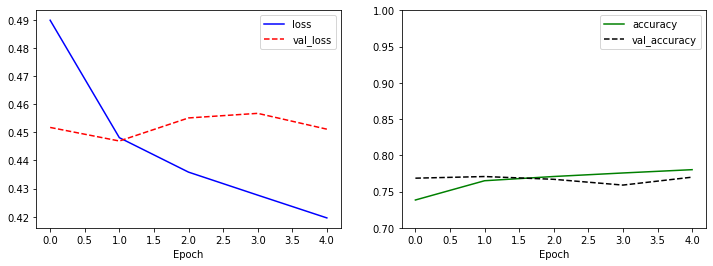

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

왼쪽 그래프에서 `val_loss`는 증가하는데 비해, 오른쪽 그래프에서는 `val_accuracy`가 떨어지는 것으로 보아 네트워크가 과적합되는 것으로 보입니다. 

과적합의 이유는 임베딩 레이어를 랜덤한 값에서부터 시작해서 학습시키기 때문에 각 단어를 나타내는 벡터의 품질이 좋지 않아서입니다. 이를 개선하기 위해서는 임베딩 레이어를 별도로 학습시켜서 네트워크에 불러와서 사용하거나 `RNN`이 아닌 `CNN`을 사용하는 방법이 있습니다. 

이 부분은 추후 자료가 정리가 되면 추가적으로 기술하도록 합니다. 



### (7) 학습 결과 테스트
학습된 네트워크에서 테스트 데이터는 어떻게 평가를 할까요? 확인을 위해 `test_text`에도 `train_text`와 같은 변환 과정을 거쳐서 `test_X`를 만듭니다. 

여기에서 한가지 주목해야 하는 것은 `train_X`를 만들 때 학습시킨 `Tokenizer`를 어떤 변경 없이 그대로 사용한다는 것입니다. 

이렇게 하는 이유는 테스트 데이터는 우리 손에 없다는 가정하에 작업을 진행합니다. 

In [0]:
test_text_X = [row.split('\t')[1] for row in test_text.split('\n')[1:] if row.count('\t') > 0]
test_text_X = [clean_str(sentence) for sentence in test_text_X]

# 문장을 띄어쓰기 단위로 단어 분리
sentences = [sentence.split(' ') for sentence in test_text_X]
sentence_new = []
for sentence in sentences:
  sentence_new.append([word[:5] for word in sentence][:25])

sentences = sentence_new

test_X = tokenizer.texts_to_sequences(sentences)
test_X = pad_sequences(test_X, padding='post')

model.evaluate(test_X, test_Y, verbose=0)


[0.4587577283382416, 0.7637199759483337]

테스트 데이터의 정확도는 약 76%로 나왔습니다. 이는 검증 데이터와 비슷한 값입니다. 그렇다면 임의의 문장에 대한 감성 분석은 어떨까요? 순환 신경망이 입력의 변화에 따라 값이 변한다는 것을 확인하기 위해 하나의 문장을 잘라서 앞에서부터 차례로 입력합니다. 

In [0]:
test_sentence = '재미있을 줄 알았는데 완전 실망했다. 너무 졸리고 돈이 아까웠다.'
test_sentence = test_sentence.split(' ')
test_sentences = []
now_sentence = []
for word in test_sentence:
    now_sentence.append(word)
    test_sentences.append(now_sentence[:])
    
test_X_1 = tokenizer.texts_to_sequences(test_sentences)
test_X_1 = pad_sequences(test_X_1, padding='post', maxlen=25)
prediction = model.predict(test_X_1)
for idx, sentence in enumerate(test_sentences):
    print(sentence)
    print(prediction[idx])

['재미있을']
[0.5659361  0.43406394]
['재미있을', '줄']
[0.55835325 0.44164675]
['재미있을', '줄', '알았는데']
[0.56154287 0.4384571 ]
['재미있을', '줄', '알았는데', '완전']
[0.5674858  0.43251416]
['재미있을', '줄', '알았는데', '완전', '실망했다.']
[0.5674858  0.43251416]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무']
[0.64270234 0.35729766]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고']
[0.64270234 0.35729766]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이']
[0.98596686 0.0140331 ]
['재미있을', '줄', '알았는데', '완전', '실망했다.', '너무', '졸리고', '돈이', '아까웠다.']
[0.98596686 0.0140331 ]


출력은 문장의 변화에 따른 감성 분석 예측 결과입니다. 단어의 문장이 길어지면 길어질수록 정확도가 올라가는데, 특이한 것이 있다면, `너무`라는 단어 `졸리고`가 나왔을 때 99%의 확률로 부정적 감성을 예측하는 것을 볼 수 있습니다. 

영화의 특성상, `졸립다`라는 특성은 사실 굉장히 많은 부정적인 뜻을 내포하기 때문에 어쩌면 대표적인 단어일 수도 있다는 생각을 해봅니다. 



## III. 연습 파일
- [구글 Colab에서 직접 연습해보자](https://colab.research.google.com/github/chloevan/deeplearningAI/blob/master/tensorflow2.0/ch7_3_sentimentAnalysis.ipynb) 

## IV. Reference

김환희. (2020). 시작하세요! 텐서플로 2.0 프로그래밍: 기초 이론부터 실전 예제까지 한번에 끝내는 머신러닝, 딥러닝 핵심 가이드. 서울: 위키북스.